In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import re
from sklearn.preprocessing import LabelEncoder


Reading Dataset

In [2]:
data = pd.read_csv('/content/train(1).csv')


In [3]:
# Display basic statistics
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

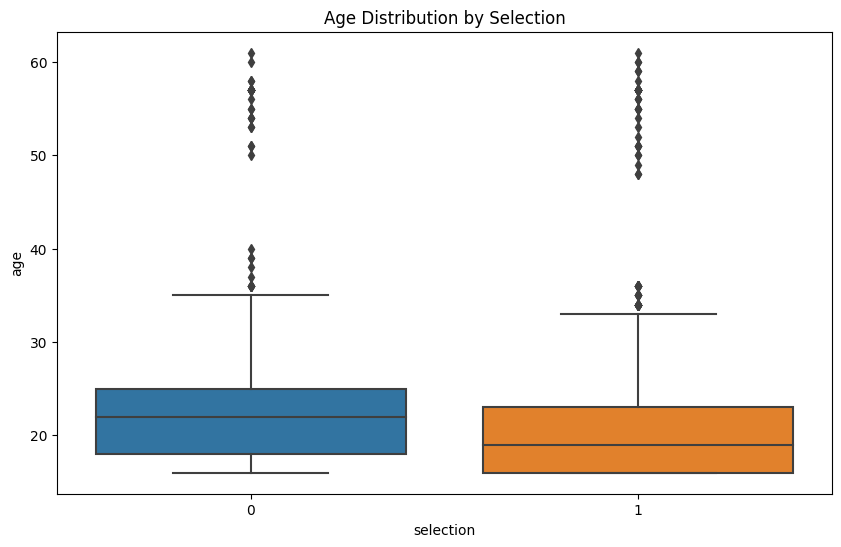

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='selection', y='age', data=data)
plt.title('Age Distribution by Selection')
plt.show()

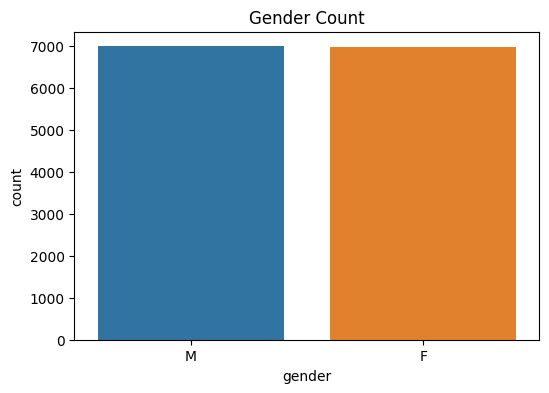

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=data)
plt.title('Gender Count')
plt.show()

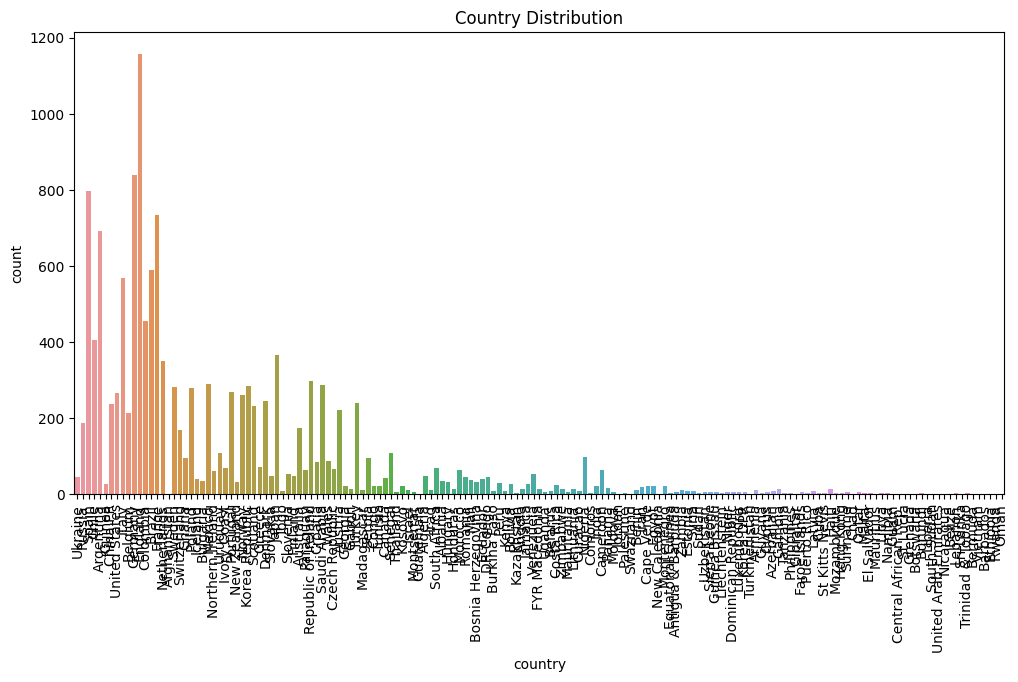

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=data)
plt.xticks(rotation=90)
plt.title('Country Distribution')
plt.show()

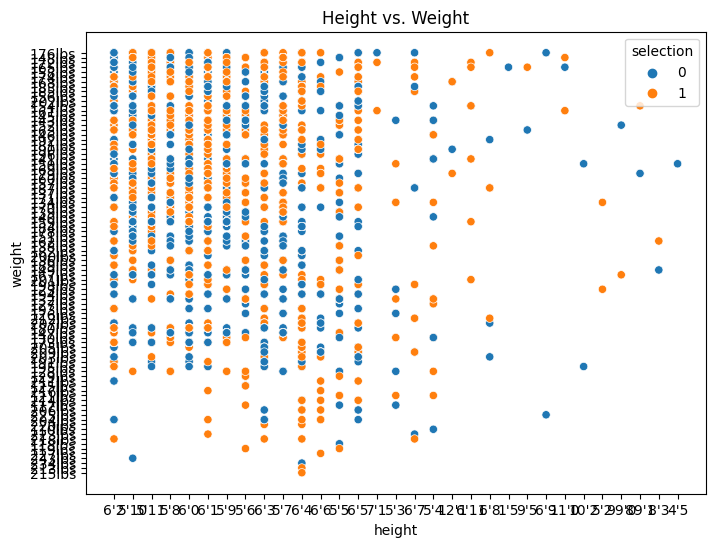

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height', y='weight', data=data, hue='selection')
plt.title('Height vs. Weight')
plt.show()

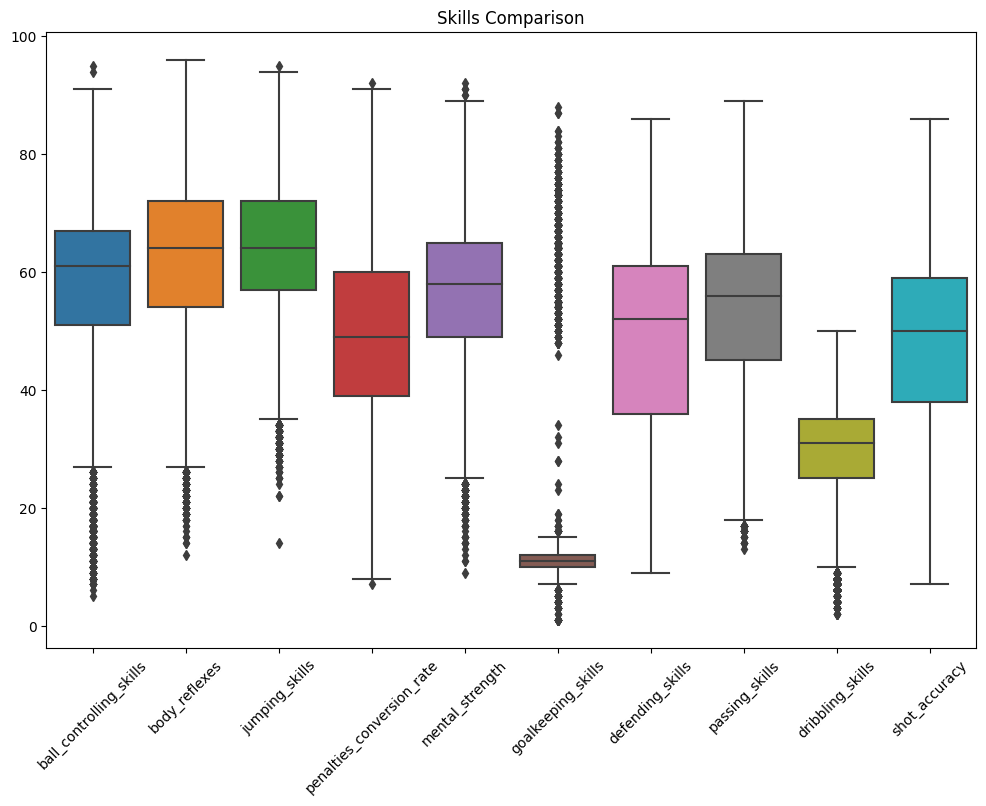

In [8]:
skills_cols = ['ball_controlling_skills', 'body_reflexes', 'jumping_skills', 'penalties_conversion_rate',
               'mental_strength', 'goalkeeping_skills', 'defending_skills', 'passing_skills',
               'dribbling_skills', 'shot_accuracy']

plt.figure(figsize=(12, 8))
sns.boxplot(data=data[skills_cols])
plt.xticks(rotation=45)
plt.title('Skills Comparison')
plt.show()

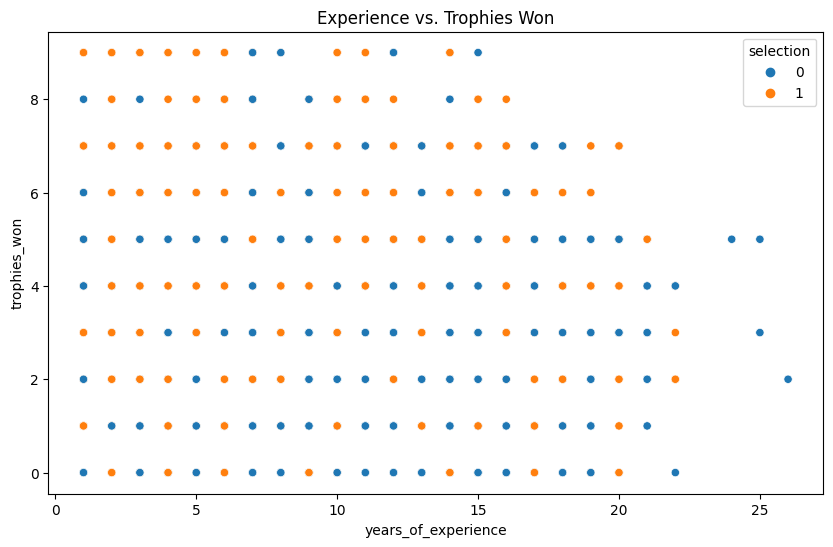

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='years_of_experience', y='trophies_won', data=data, hue='selection')
plt.title('Experience vs. Trophies Won')
plt.show()

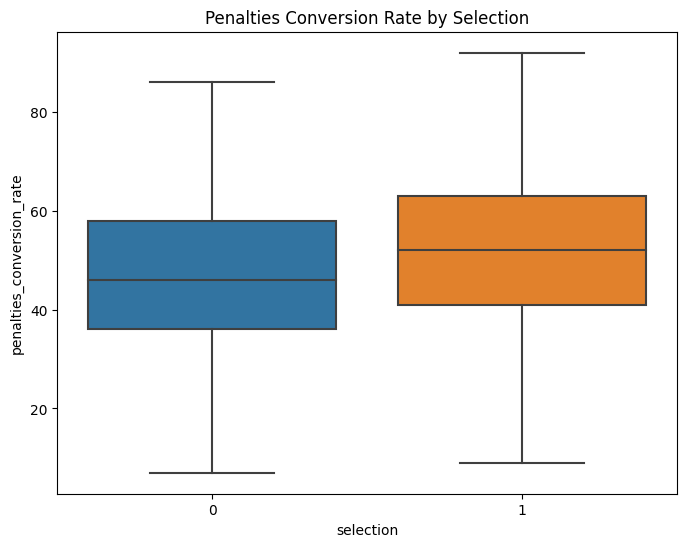

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='selection', y='penalties_conversion_rate', data=data)
plt.title('Penalties Conversion Rate by Selection')
plt.show()

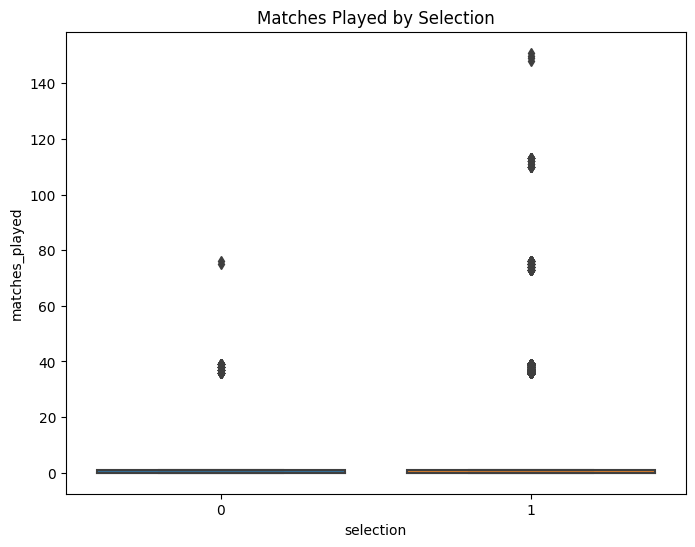

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='selection', y='matches_played', data=data)
plt.title('Matches Played by Selection')
plt.show()

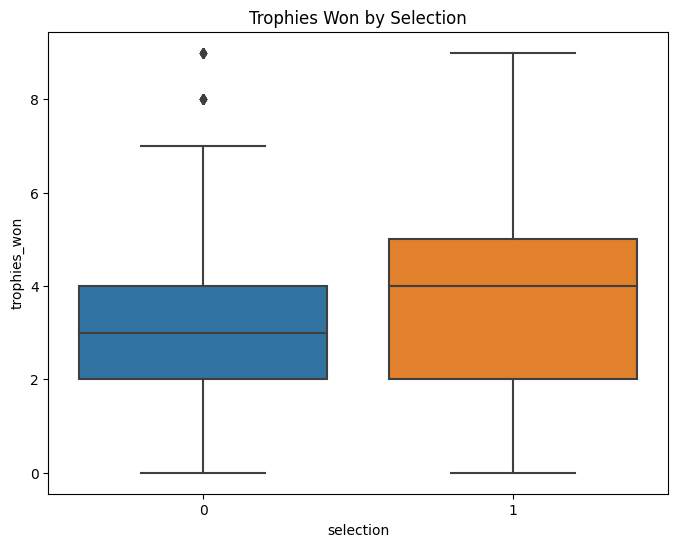

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='selection', y='trophies_won', data=data)
plt.title('Trophies Won by Selection')
plt.show()

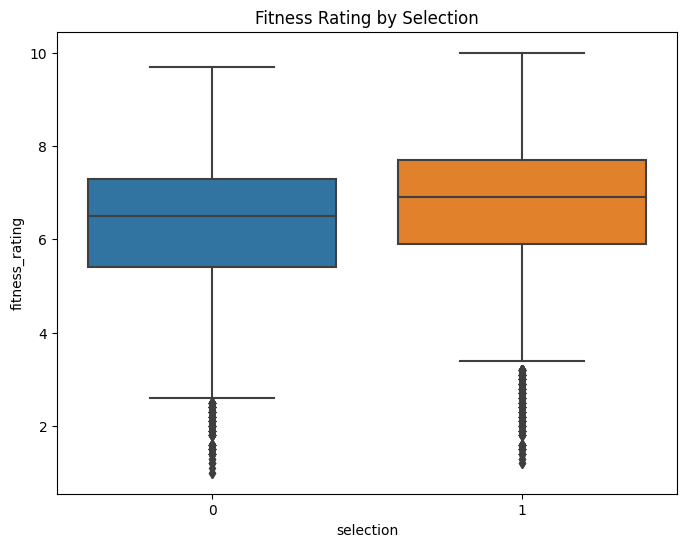

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='selection', y='fitness_rating', data=data)
plt.title('Fitness Rating by Selection')
plt.show()

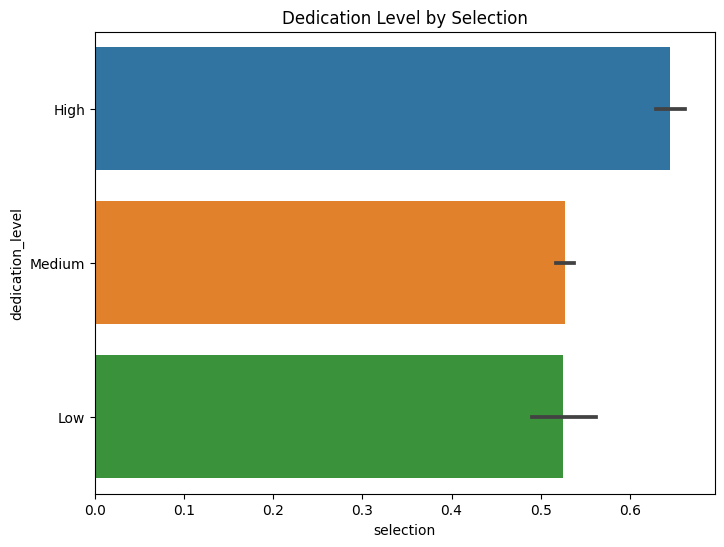

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='selection', y='dedication_level', data=data)
plt.title('Dedication Level by Selection')
plt.show()

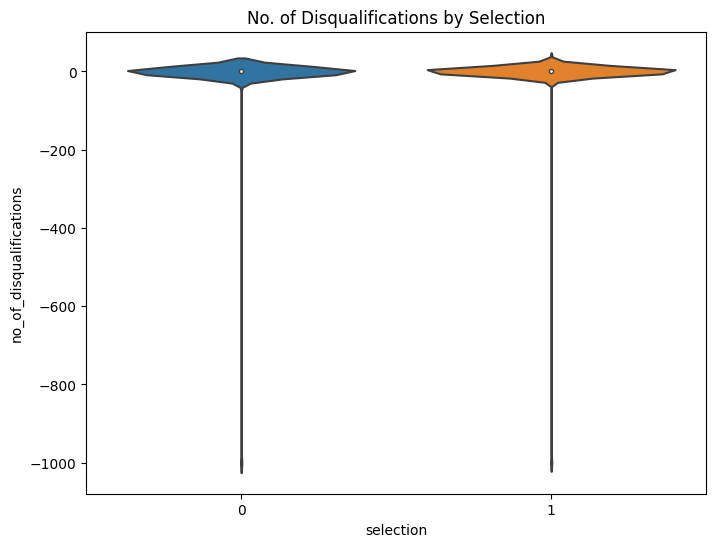

In [15]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='selection', y='no_of_disqualifications', data=data)
plt.title('No. of Disqualifications by Selection')
plt.show()

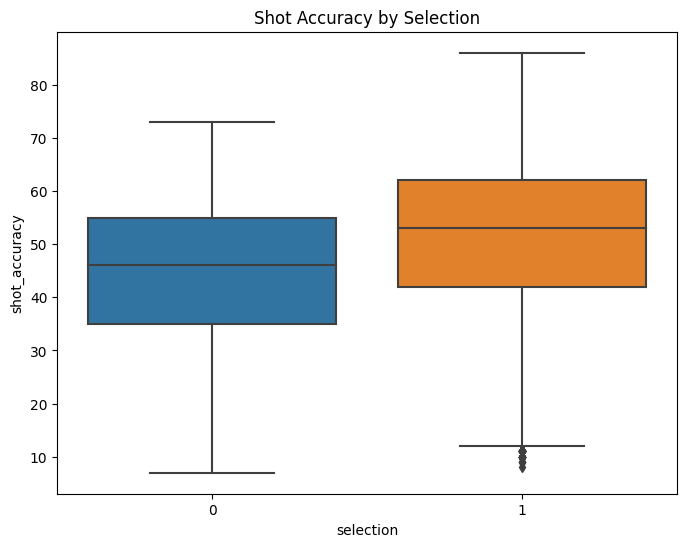

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='selection', y='shot_accuracy', data=data)
plt.title('Shot Accuracy by Selection')
plt.show()

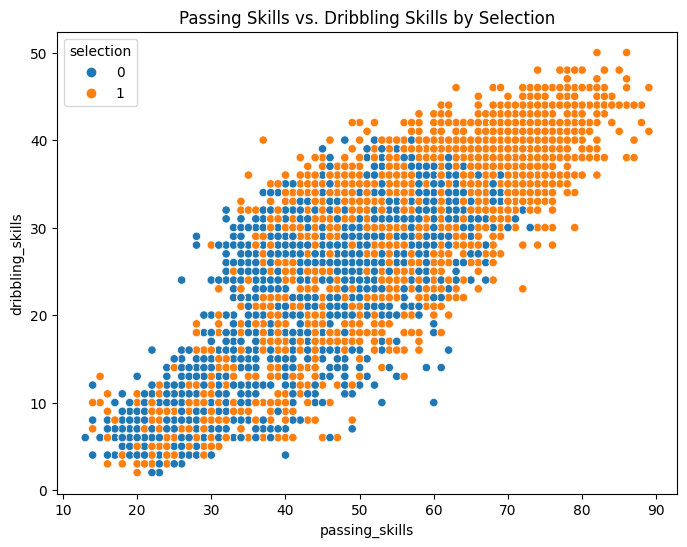

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='passing_skills', y='dribbling_skills', hue='selection', data=data)
plt.title('Passing Skills vs. Dribbling Skills by Selection')
plt.show()

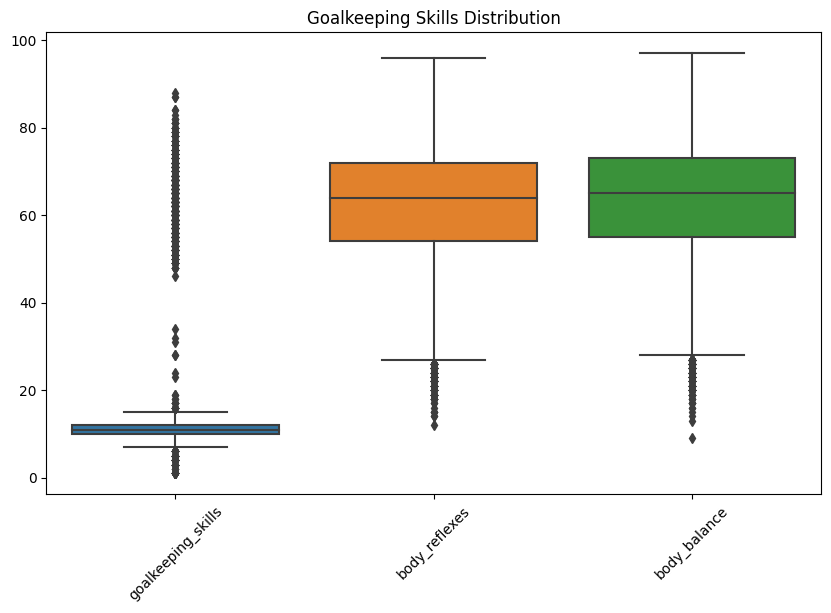

In [18]:
goalkeeping_cols = ['goalkeeping_skills', 'body_reflexes', 'body_balance']
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[goalkeeping_cols])
plt.xticks(rotation=45)
plt.title('Goalkeeping Skills Distribution')
plt.show()

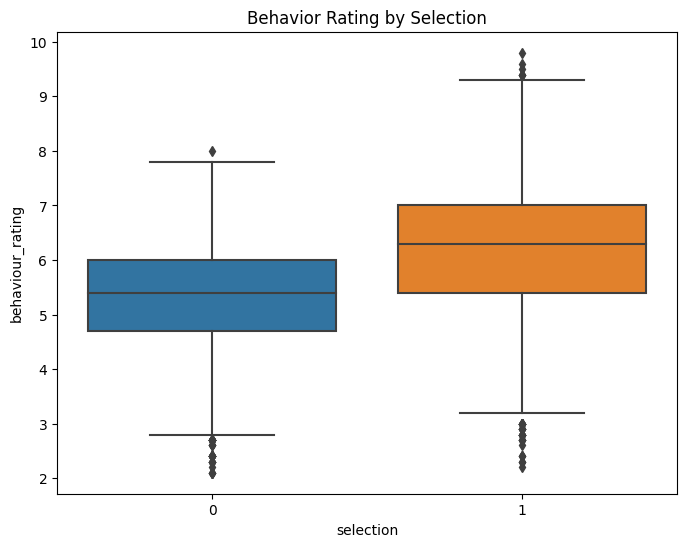

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='selection', y='behaviour_rating', data=data)
plt.title('Behavior Rating by Selection')
plt.show()

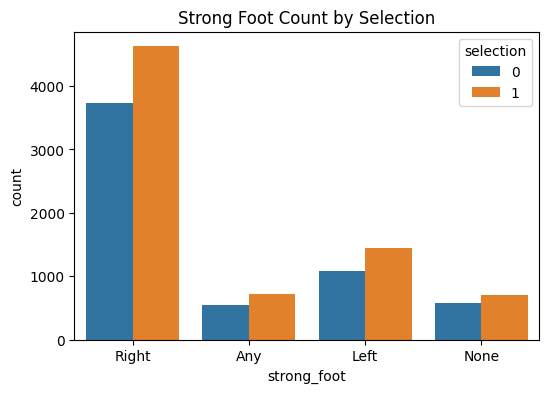

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='strong_foot', hue='selection', data=data)
plt.title('Strong Foot Count by Selection')
plt.show()

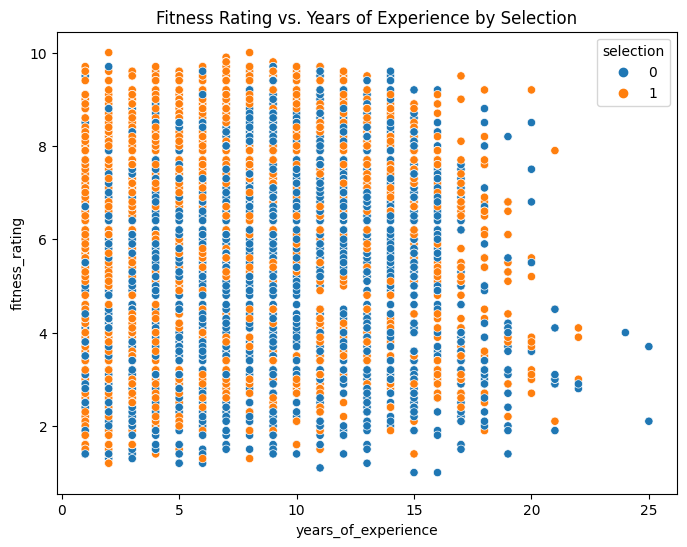

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='years_of_experience', y='fitness_rating', hue='selection', data=data)
plt.title('Fitness Rating vs. Years of Experience by Selection')
plt.show()

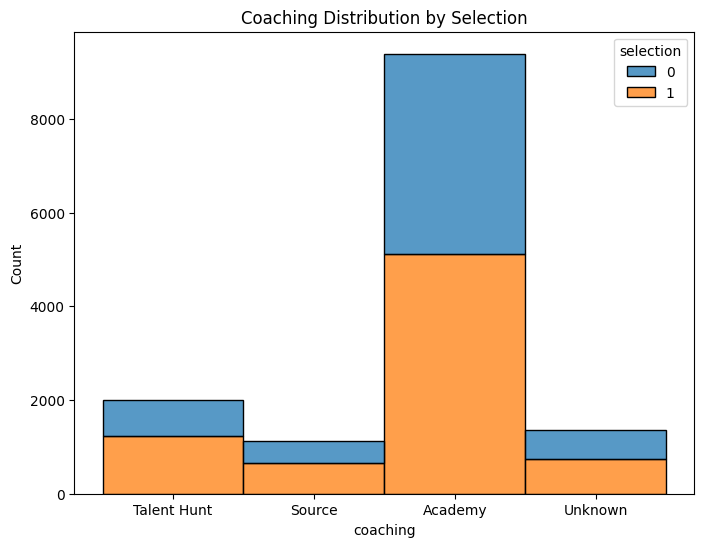

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='coaching', hue='selection', multiple='stack', bins=20)
plt.title('Coaching Distribution by Selection')
plt.show()

In [23]:
data.isnull().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

Handling Missing Values and Cleaning

In [24]:
data['weight_numeric'] = data['weight'].str.extract('(\d+)').astype(float)
data['weight_kg'] = data['weight_numeric'] * 0.453592
mean_weight_kg = data[data['weight_kg'].notnull()]['weight_kg'].mean()
data.loc[data['weight_kg'].isnull(), 'weight'] = mean_weight_kg
data.drop(['weight_numeric', 'weight_kg'], axis=1, inplace=True)


In [25]:
median_ball_controlling = data['ball_controlling_skills'].median()
data['ball_controlling_skills'].fillna(median_ball_controlling, inplace=True)

In [26]:
mean_jumping_skills = data['jumping_skills'].mean()
data['jumping_skills'].fillna(mean_jumping_skills, inplace=True)


In [27]:
mean_penalties_rate = data['penalties_conversion_rate'].mean()
data['penalties_conversion_rate'].fillna(mean_penalties_rate, inplace=True)


In [28]:
mean_mental_strength = data['mental_strength'].mean()
data['mental_strength'].fillna(mean_mental_strength, inplace=True)


In [29]:
mode_gender = data['gender'].mode()[0]
data['gender'].fillna(mode_gender, inplace=True)


In [30]:
mode_strong_foot = data['strong_foot'].mode()[0]
data['strong_foot'].fillna(mode_strong_foot, inplace=True)
data.head()


,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [31]:
mode_shot_accuracy = data['shot_accuracy'].mode()[0]
data['shot_accuracy'].fillna(mode_shot_accuracy, inplace=True)


In [32]:
mode_behavior_rating = data['behaviour_rating'].mode()[0]
data['behaviour_rating'].fillna(mode_behavior_rating, inplace=True)


In [33]:
mode_matches_played = data['matches_played'].mode()[0]
data['matches_played'].fillna(mode_matches_played, inplace=True)


In [34]:
mode_fitness_rating = data['fitness_rating'].mode()[0]
data['fitness_rating'].fillna(mode_fitness_rating, inplace=True)


In [35]:
mean_years_of_experience = data['years_of_experience'].mean()
data['years_of_experience'].fillna(mean_years_of_experience, inplace=True)


In [36]:
mode_coaching = data['coaching'].mode()[0]
data['coaching'].fillna(mode_coaching, inplace=True)


In [37]:
data.isnull().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [38]:
data.drop(['player_id', 'name'], axis=1, inplace=True)


Encoding

In [39]:
columns_to_encode = ['gender', 'country', 'strong_foot', 'dedication_level', 'coaching',]
label_encoder = LabelEncoder()
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])


In [40]:
data.head()

,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,1,153,6'2,176lbs,77.0,58.0,47.0,59.0,41.0,...,3,7.7,0.0,8.1,2.0,0,2,8.0,0.0,1
1,18,1,124,5'10,148lbs,54.0,69.0,70.0,62.0,53.0,...,0,5.3,0.0,7.0,3.0,2,1,3.0,0.0,0
2,16,0,135,6'2,172lbs,34.0,43.0,45.0,69.0,49.0,...,1,4.7,0.0,6.6,5.0,1,0,2.0,0.0,1
3,27,1,28,5'11,165lbs,79.0,73.0,76.0,86.0,81.0,...,3,8.6,113.0,8.6,6.0,2,0,13.0,16.0,1
4,19,0,5,5'8,158lbs,47.0,61.0,74.0,57.0,49.0,...,3,5.9,0.0,5.7,5.0,2,0,4.0,0.0,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13994 non-null  int64  
 1   gender                     13994 non-null  int64  
 2   country                    13994 non-null  int64  
 3   height                     13994 non-null  object 
 4   weight                     13994 non-null  object 
 5   ball_controlling_skills    13994 non-null  float64
 6   body_reflexes              13994 non-null  float64
 7   body_balance               13994 non-null  float64
 8   jumping_skills             13994 non-null  float64
 9   penalties_conversion_rate  13994 non-null  float64
 10  mental_strength            13994 non-null  float64
 11  goalkeeping_skills         13994 non-null  float64
 12  defending_skills           13994 non-null  float64
 13  passing_skills             13994 non-null  flo

In [42]:
data['height_numeric'] = data['height'].apply(lambda x: int(x.split("'")[0]) * 12 + int(x.split("'")[1]))
data['weight_numeric'] = data['weight'].str.extract('(\d+)').astype(float)


In [43]:
data.drop(columns=['height', 'weight'], inplace=True)


In [44]:
data.head()

,age,gender,country,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection,height_numeric,weight_numeric
0,23,1,153,77.0,58.0,47.0,59.0,41.0,73.0,13.0,...,0.0,8.1,2.0,0,2,8.0,0.0,1,74,176.0
1,18,1,124,54.0,69.0,70.0,62.0,53.0,43.0,10.0,...,0.0,7.0,3.0,2,1,3.0,0.0,0,70,148.0
2,16,0,135,34.0,43.0,45.0,69.0,49.0,45.0,10.0,...,0.0,6.6,5.0,1,0,2.0,0.0,1,74,172.0
3,27,1,28,79.0,73.0,76.0,86.0,81.0,80.0,3.0,...,113.0,8.6,6.0,2,0,13.0,16.0,1,71,165.0
4,19,0,5,47.0,61.0,74.0,57.0,49.0,35.0,9.0,...,0.0,5.7,5.0,2,0,4.0,0.0,0,68,158.0


In [45]:
data.isnull().sum()


age                            0
gender                         0
country                        0
ball_controlling_skills        0
body_reflexes                  0
body_balance                   0
jumping_skills                 0
penalties_conversion_rate      0
mental_strength                0
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                  0
body_strength_stamina          0
max_running_speed              0
strong_foot                    0
behaviour_rating               0
matches_played                 0
fitness_rating                 0
trophies_won                   0
dedication_level               0
coaching                       0
years_of_experience            0
no_of_disqualifications        0
selection                      0
height_numeric                 0
weight_numeric               417
dtype: int64

In [46]:
mean_weight = data['weight_numeric'].mean()
data['weight_numeric'].fillna(mean_weight, inplace=True)


Modeling

  

In [47]:
X = data.drop(['selection'], axis=1)
y = data['selection']



In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [51]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8481600571632726


In [52]:
# Support Vector Classifier (SVC)
svc_model = SVC(kernel='rbf', random_state=42)
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
print("SVC Accuracy:", svc_accuracy)


SVC Accuracy: 0.7806359414076456


In [53]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.75848517327617


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.7802786709539121


In [55]:
# Random Forest Hyperparameter Tuning

rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf_grid_search = GridSearchCV(rf_model, param_grid=rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Best Accuracy:", rf_accuracy)

Random Forest Best Accuracy: 0.8531618435155413


In [56]:
# Logistic Regression Hyperparameter Tuning
logreg_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
lr_grid_search = GridSearchCV(lr_model, param_grid=lr_param_grid, cv=3)
lr_grid_search.fit(X_train, y_train)
lr_best_model = lr_grid_search.best_estimator_
lr_predictions = lr_best_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Best Accuracy:", lr_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Best Accuracy: 0.7767059664165773


In [57]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid_search = GridSearchCV(dt_model, param_grid=dt_param_grid, cv=3)
dt_grid_search.fit(X_train, y_train)
dt_best_model = dt_grid_search.best_estimator_
dt_predictions = dt_best_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Best Accuracy:", dt_accuracy)

Decision Tree Best Accuracy: 0.8174347981421937


In [ ]:
svm_model = SVC(random_state=42)
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(svm_model, param_grid=svm_param_grid, cv=3)
svm_grid_search.fit(X_train, y_train)
svm_best_model = svm_grid_search.best_estimator_
svm_predictions = svm_best_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Best Accuracy:", svm_accuracy)


The Hypertuned random forest gives the best accuracy out of all models